In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Read the data
df=pd.read_csv('/content/drive/MyDrive/Fraud Detection Ml/dataset.csv')
# Shape the data
df.shape


(28297, 11)

In [ ]:
# Get head of the data
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0.0,0.0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0.0,0.0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0.0,0.0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0.0,0.0


In [ ]:
df.tail(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
28097,8,CASH_OUT,166118.77,C837065452,0.0,0.0,C305259590,738562.78,937916.52,0.0,0.0
28098,8,CASH_OUT,112723.85,C487807730,0.0,0.0,C619068319,113022.06,225745.92,0.0,0.0
28099,8,CASH_OUT,52305.89,C143055340,0.0,0.0,C1494271614,126523.69,178829.57,0.0,0.0
28100,8,CASH_OUT,39796.72,C1882410555,0.0,0.0,C1494895909,928289.95,1362678.43,0.0,0.0
28101,8,CASH_OUT,56580.04,C1704302891,0.0,0.0,C656400047,88500.14,1597668.67,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.0,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.0,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.0,C1326121635,112673.41,202020.02,0.0,0.0
28295,8,CASH_OUT,138651.85,C297851161,0.0,0.0,C1034382650,142758.39,281410.24,0.0,0.0


In [ ]:
# Check for null values
df.isnull().values.any()
#we should gets false for presentable values

True

In [ ]:

# Getting information about data
df.info()
#No of rows = some value, otherwise NAN value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28297 entries, 0 to 28296
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28297 non-null  int64  
 1   type            28297 non-null  object 
 2   amount          28297 non-null  float64
 3   nameOrig        28297 non-null  object 
 4   oldbalanceOrg   28297 non-null  float64
 5   newbalanceOrig  28297 non-null  float64
 6   nameDest        28297 non-null  object 
 7   oldbalanceDest  28297 non-null  float64
 8   newbalanceDest  28297 non-null  float64
 9   isFraud         28296 non-null  float64
 10  isFlaggedFraud  28296 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.4+ MB


In [ ]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  28212
Number of Fraud transactions:  84
Percentage of Legit transactions: 99.7031 %
Percentage of Fraud transactions: 0.2969 %


In [ ]:
# Merchants
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

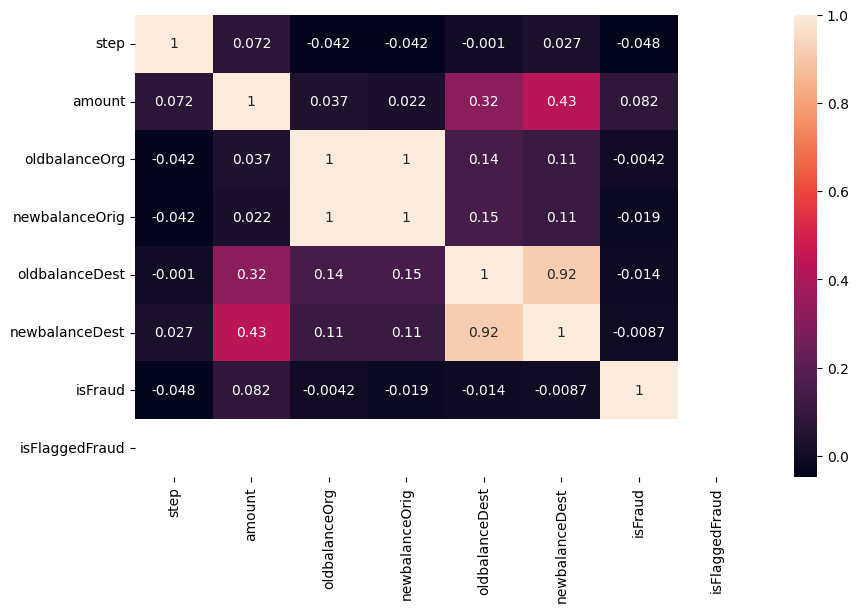

In [ ]:
corr=df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

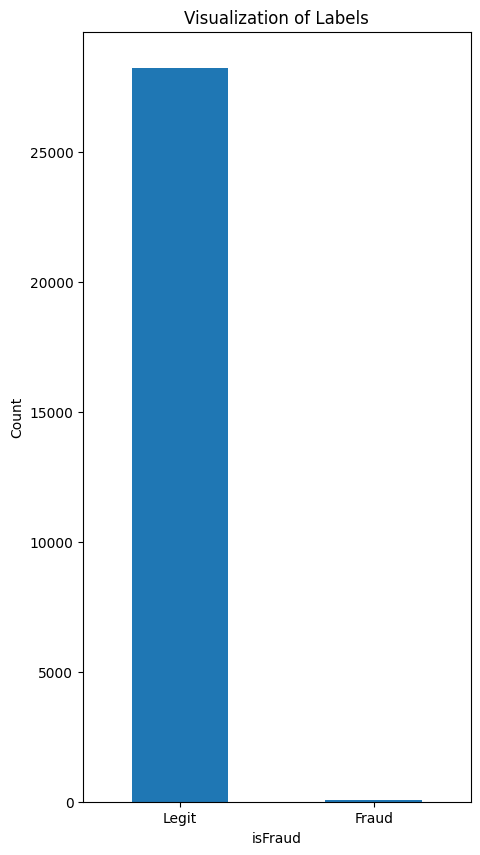

In [ ]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [ ]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28297 entries, 0 to 28296
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28297 non-null  int64  
 1   type            28297 non-null  int64  
 2   amount          28297 non-null  float64
 3   nameOrig        28297 non-null  int64  
 4   oldbalanceOrg   28297 non-null  float64
 5   newbalanceOrig  28297 non-null  float64
 6   nameDest        28297 non-null  int64  
 7   oldbalanceDest  28297 non-null  float64
 8   newbalanceDest  28297 non-null  float64
 9   isFraud         28296 non-null  float64
 10  isFlaggedFraud  28296 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 2.4 MB
None


In [ ]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,3271,170136.0,160296.36,10143,0.0,0.0,0.0,0.0
1,1,3,1864.28,9757,21249.0,19384.72,10589,0.0,0.0,0.0,0.0
2,1,4,181.00,4372,181.0,0.00,2452,0.0,0.0,1.0,0.0
3,1,1,181.00,25969,181.0,0.00,2180,21182.0,0.0,1.0,0.0
4,1,3,11668.14,15331,41554.0,29885.86,4769,0.0,0.0,0.0,0.0


In [ ]:
# Import library for VIF (VARIANCE INFLATION FACTOR)
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    # Replacing infinite values with NaN
    df_finite = df.replace([np.inf, -np.inf], np.nan)

    # Dropping rows with NaN values
    df_no_nan = df_finite.dropna()

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df_no_nan.columns
    vif["VIF"] = [variance_inflation_factor(df_no_nan.values, i) for i in range(df_no_nan.shape[1])]

    return(vif)

calc_vif(new_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,4.650376
1,type,5.866844
2,amount,1.872474
3,nameOrig,3.347341
4,oldbalanceOrg,318.311015
5,newbalanceOrig,321.681367
6,nameDest,3.948687
7,oldbalanceDest,7.589464
8,newbalanceDest,8.488391
9,isFraud,1.059569


In [ ]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,type,3.537958
1,amount,1.440325
2,isFraud,1.055501
3,isFlaggedFraud,NaN
4,Actual_amount_orig,1.145913
5,Actual_amount_dest,1.285645
6,TransactionPath,3.389203


<Axes: >

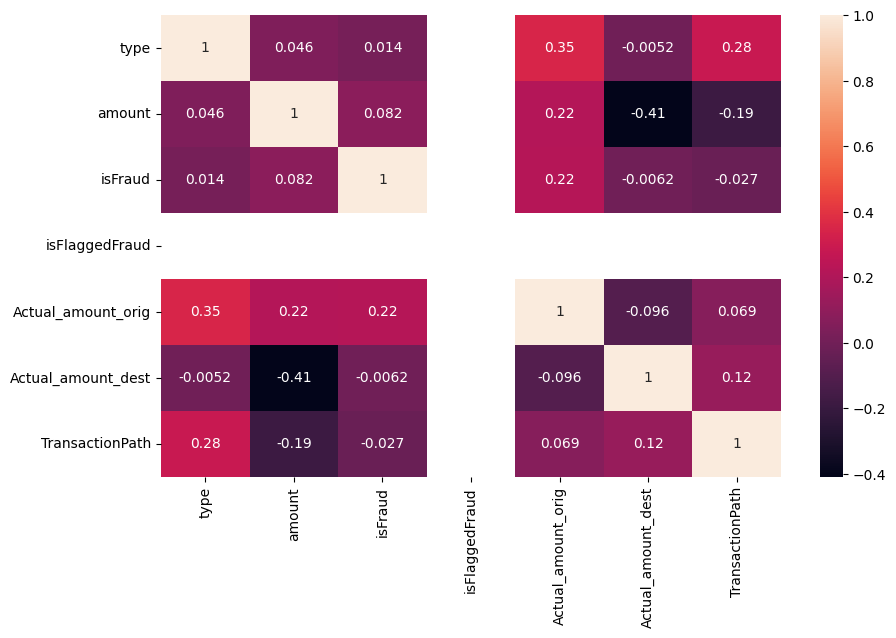

In [ ]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

In [ ]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19807, 6)
Shape of X_test:  (8490, 6)


In [ ]:
# X_train.isnull().values.any()
# X_train.head()
X_train.isna()
X_train_New = X_train.dropna()

Y_train.isna()
Y_train_New = Y_train.dropna()

In [ ]:
print("Shape of X_train_New:", X_train_New.shape)
print("Shape of Y_train_New:", Y_train_New.shape)

Shape of X_train_New: (19806, 6)
Shape of Y_train_New: (19806,)


In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_New, Y_train_New)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [ ]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train_New, Y_train_New)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [ ]:
print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.59952885747938
Random Forest Score:  99.75265017667844


In [ ]:
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 7
False Positives: 13
True Negatives: 8449
False Negatives: 21
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 7
False Positives: 0
True Negatives: 8462
False Negatives: 21


In [ ]:
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)


Confusion Matrix - Decision Tree
[[8449   13]
 [  21    7]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[8462    0]
 [  21    7]]


In [ ]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8462
         1.0       0.35      0.25      0.29        28

    accuracy                           1.00      8490
   macro avg       0.67      0.62      0.64      8490
weighted avg       1.00      1.00      1.00      8490

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8462
         1.0       1.00      0.25      0.40        28

    accuracy                           1.00      8490
   macro avg       1.00      0.62      0.70      8490
weighted avg       1.00      1.00      1.00      8490



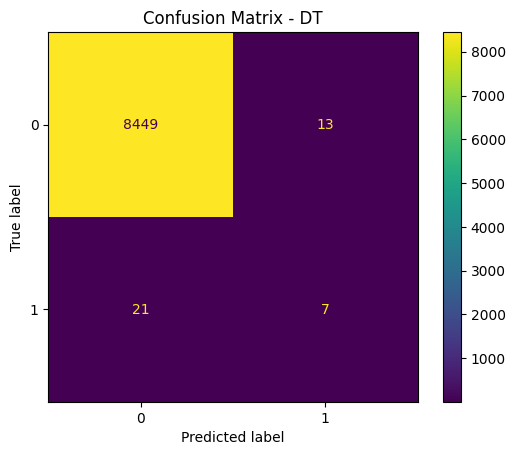

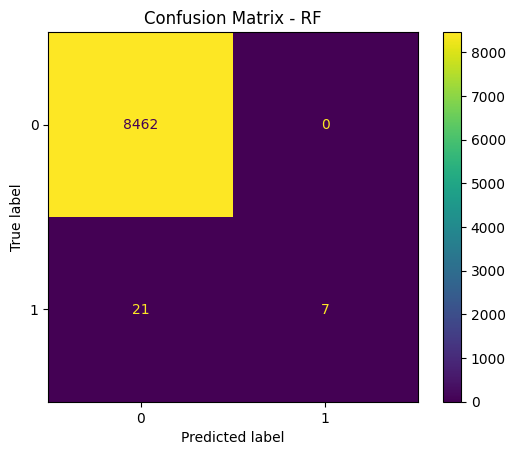

In [ ]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

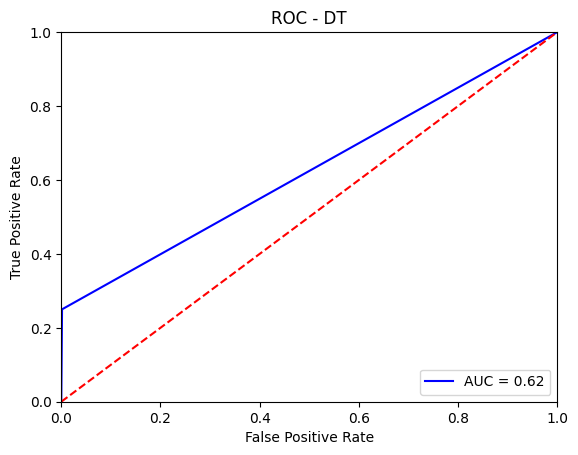

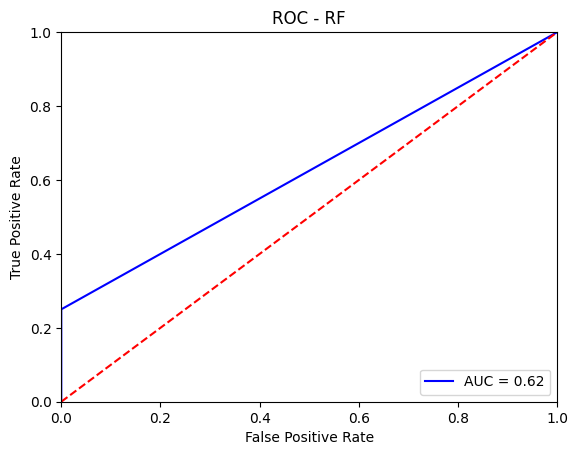

In [ ]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()